In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.io as sci
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from pathlib import Path
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import losses, optimizers,layers
from keras.layers import Conv2D, Flatten, BatchNormalization  # we have 2D images 
from keras.layers import Dense, ReLU 
from keras.models import Sequential
import os
from scipy.io import loadmat
from sklearn.model_selection import train_test_split, KFold

In [5]:
import warnings

if not tf.test.gpu_device_name():
    warnings.warn('No GPU found')

else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

<ipython-input-5-e08102dfe8f7>:4: UserWarning: No GPU found
  warnings.warn('No GPU found')


In [6]:
# load data
NumberData = loadmat("NumberRecognitionBigger.mat")

#extract images and label from dictionary
images = NumberData['X']
label = NumberData['y']

images = np.transpose(images,[2,0,1])
images = images.reshape(images.shape[0], 28, 28, 1)

label = np.transpose(label)
print(f"shape of images is: {images.shape} \nshape of label is: {label.shape}")

shape of images is: (30000, 28, 28, 1) 
shape of label is: (30000, 1)


In [4]:
# # create training, validation, testing sets and scale them

# X_train_all, X_test, y_train_all, y_test = train_test_split(images, label, test_size=0.20)

# X_val, X_train = X_train_all[:5000] / 255.0, X_train_all[5000:] / 255.0
# y_val, y_train = y_train_all[:5000], y_train_all[5000:]
# X_test = X_test/255


# #no scaling
# # X_val, X_train = X_train_all[:5000], X_train_all[5000:]
# # y_val, y_train = y_train_all[:5000], y_train_all[5000:]

# print(f"shape of X_train is: {X_train.shape} \nshape of y_train is: {y_train.shape} \nshape of X_test is: {X_test.shape} \nshape of X_test is: {y_test.shape} \nshape of X_val is: {X_val.shape} \nshape of y_val is: {y_val.shape}")


In [19]:
num_classes = 10
kFoldVal = KFold(n_splits=5, random_state=42, shuffle= True)
for trainIndex, testIndex in kFoldVal.split(images):
    x_train_full, x_test, y_train_full, y_test = images[trainIndex], images[testIndex], label[trainIndex], label[testIndex]
    
    x_train, x_test, y_train, y_test = x_train_full[:16000] / 255.0, x_test / 255.0, y_train_full[:16000], y_test
    x_val, y_val = x_train_full[16000:] / 255.0 , y_train_full[16000:]
    # convert class vectors to binary class matrices
    y_val = keras.utils.to_categorical(y_val, num_classes)
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    print(x_train.shape)
    print(x_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    # architecture reference : https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist
    #model is build via sequential
    model = tf.keras.models.Sequential()

    #add convolution layer
    model.add(tf.keras.layers.Conv2D(32, kernel_size=3, input_shape=(28,28,1), activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(32, kernel_size=5, strides=2, input_shape=(28,28,1), activation="relu", padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.4))

    #add convolution layer
    model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), activation="relu", padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=128, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.4))
        
    # Finish with 10 softmax output nodes
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))# multiclass classification output, use softmax
    model.summary()

print(f"shape of x_train is: {x_train.shape} \nshape of y_train is: {y_train.shape} \nshape of x_test is: {x_test.shape} \nshape of X_test is: {y_test.shape}\n shape of x_val is: {x_val.shape} shape of y_val is: {y_val.shape}")



(16000, 28, 28, 1)
(6000, 28, 28, 1)
(16000, 10)
(6000, 10)
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_150 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_175 (Bat (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_176 (Bat (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_177 (Bat (None, 12, 12, 32)        128       
___________________________________________________________

(16000, 28, 28, 1)
(6000, 28, 28, 1)
(16000, 10)
(6000, 10)
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_168 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_196 (Bat (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_197 (Bat (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_198 (Bat (None, 12, 12, 32)        128       
___________________________________________________________

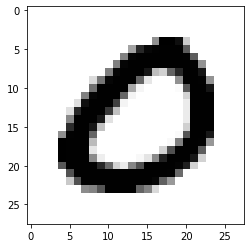

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


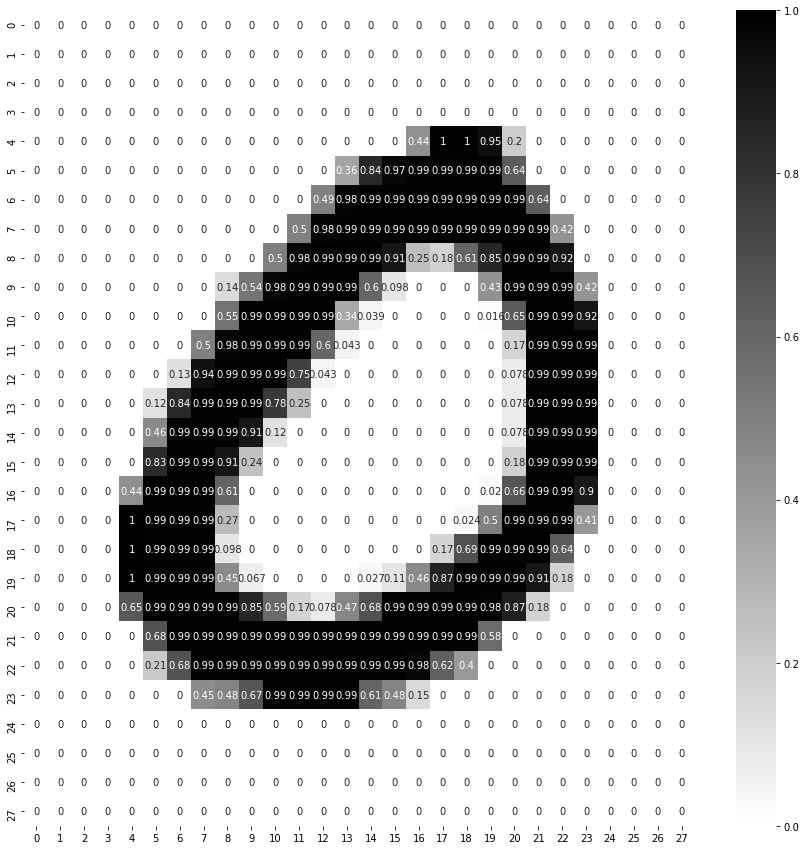

In [16]:
x_train.shape
y_train.shape
# lets view the first data point of X_train
plt.imshow(np.reshape(x_train[5000],[28,28]), cmap="binary")
plt.show()
plt.figure(figsize=(15,15))
sbn.heatmap(np.reshape(x_train[5000], [28,28]), annot=True, cmap="binary")
print(y_train[5000])

In [7]:
#check weights and biases

# hidden1 = model.layers[2]
# hidden1.get_weights()
# weights, biases = hidden1.get_weights()
# print("shape\n",weights.shape, "\n")

# biases

In [21]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
EPOCHS = 15
VALIDATION_SET = (x_val, y_val)

history = model.fit(x_train, y_train, epochs=EPOCHS, verbose=1, validation_data=VALIDATION_SET)


Epoch 1/15
500/500 [==============================] - 18s 35ms/step - loss: 0.4185 - accuracy: 0.8722 - val_loss: 0.1439 - val_accuracy: 0.9559
Epoch 2/15
500/500 [==============================] - 18s 35ms/step - loss: 0.1244 - accuracy: 0.9603 - val_loss: 0.0574 - val_accuracy: 0.9824
Epoch 3/15
500/500 [==============================] - 18s 35ms/step - loss: 0.0956 - accuracy: 0.9716 - val_loss: 0.0523 - val_accuracy: 0.9856
Epoch 4/15
500/500 [==============================] - 18s 35ms/step - loss: 0.0817 - accuracy: 0.9743 - val_loss: 0.0978 - val_accuracy: 0.9728
Epoch 5/15
500/500 [==============================] - 18s 35ms/step - loss: 0.0685 - accuracy: 0.9786 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 6/15
500/500 [==============================] - 18s 35ms/step - loss: 0.0632 - accuracy: 0.9803 - val_loss: 0.0518 - val_accuracy: 0.9854
Epoch 7/15
500/500 [==============================] - 18s 36ms/step - loss: 0.0561 - accuracy: 0.9820 - val_loss: 0.0455 - val_accuracy:

In [23]:
# save the model
import time
import os

def save_Model_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"Model save at\n{model_path}")
    return model_path

path = model.save(save_Model_path())

Model save at
SAVED_MODELS/Model_2021_01_08_03_24_51_.h5


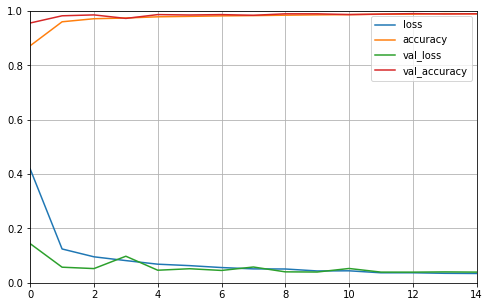

In [24]:
history_params = pd.DataFrame(history.history)
history_params

history_params.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
# test the model

model.evaluate(x_test,y_test)

188/188 [==============================] - 1s 7ms/step - loss: 0.0365 - accuracy: 0.9890


[0.03651873394846916, 0.9890000224113464]

In [26]:
#test new data

X_test_new = x_test[:10]
y_test_new = y_test[:10]
y_proba = model.predict(X_test_new)
y_proba.round(2)

array([[0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.99, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

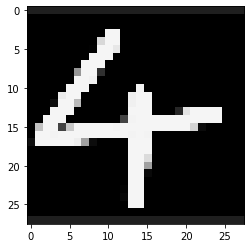

(1, 28, 28, 1)

In [37]:
"""
# test using real data
import cv2
import matplotlib.image as mpimg



def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.2989, 0.5870, 0.1140])

                  
img = mpimg.imread("four.png")
# img = mpimg.imread("one.png")
im = cv2.resize(img, (28,28))
gray = rgb2gray(im)
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

gray = gray.reshape(1,28,28,1)
gray = gray
gray.shape

"""

In [38]:
y_pred = np.argmax(model.predict(X_test_new), axis=-1)


# y_pred = np.argmax(model.predict(gray), axis=-1)

y_pred
# print(y_test_new)

array([4])

In [16]:
# for data, pred, actual in zip(X_test_new, y_pred, y_test_new):
    
#     plt.imshow(np.reshape(data,[28,28]))
#     actual = np.where(actual==1)
#     # print(actual)
#     plt.title(f"Predicted: {pred}, Actual: {actual[0]}")
# plt.show()
# print("****"*10)


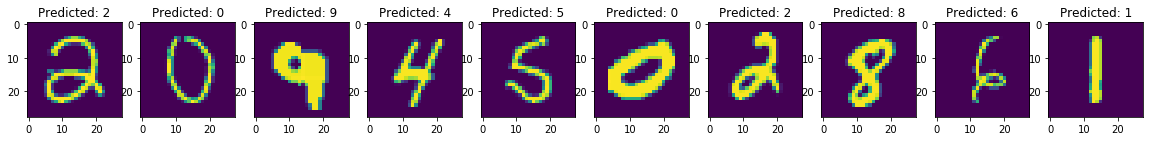

In [30]:
plt.figure(figsize=(20,4))
for index, (data, pred, actual) in enumerate(zip(X_test_new, y_pred, y_test_new)):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(data, (28,28)))
    actual = np.where(actual==1)
    plt.title(f"Predicted: {pred}")
    
plt.show()